# Imports

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


# Data Preparation

In [2]:
df = pd.read_json('export.log', lines = True)

df = (pd.DataFrame(df['jsonPayload'].values.tolist())
        .add_prefix('jsonPayload.')
        .join(df.drop('jsonPayload', 1)))
df = (pd.DataFrame(df['jsonPayload.connection'].values.tolist())
        .add_prefix('jsonPayload.connection.')
        .join(df.drop('jsonPayload.connection', 1)))
df = df.dropna(subset=['jsonPayload.rtt_msec'])
df = df.astype({
    'jsonPayload.bytes_sent': 'int32',
    'jsonPayload.rtt_msec': 'int32'
    })
# df = df.astype({'jsonPayload.connection.src_port': 'int32'})
# df = df.astype({'jsonPayload.connection.dest_port': 'int32'})
df[["jsonPayload.connection.src_ip", "jsonPayload.connection.dest_ip", "jsonPayload.bytes_sent", "jsonPayload.rtt_msec", "timestamp"]].head()
# df.info()

,jsonPayload.connection.src_ip,jsonPayload.connection.dest_ip,jsonPayload.bytes_sent,jsonPayload.rtt_msec,timestamp
7,10.2.0.2,10.2.0.10,162,0,2021-07-06 18:41:47.579858+00:00
10,10.2.0.2,10.2.0.12,0,0,2021-07-06 18:41:53.805412+00:00
11,10.2.0.2,10.2.0.12,0,37,2021-07-06 18:41:54.760529+00:00
14,10.2.0.2,10.2.0.10,162,0,2021-07-06 18:42:11.659794+00:00
15,10.2.0.2,10.2.0.12,162,0,2021-07-06 18:42:14.230429+00:00


In [26]:
fromClient = df[df['jsonPayload.connection.src_ip']=='10.2.0.2']
toServer = df[df['jsonPayload.connection.dest_ip']=='10.2.0.3']

nodes = ["10.2.0.10", "10.2.0.11", "10.2.0.12"]
fromClientDataset = {}
toServerDataset = {}
for node in nodes: 
    fromClientDataset[node] = fromClient[fromClient['jsonPayload.connection.dest_ip']==node]

for node in nodes: 
    toServerDataset[node] = toServer[toServer['jsonPayload.connection.src_ip']==node]


# fromClientTo4 = fromClientTo4[fromClientTo4['jsonPayload.connection.dest_port']==8080]
# fromClientTo4 = fromClientTo4[fromClientTo4['jsonPayload.bytes_sent']!=0]
# toServer.head()
# toServerDataset["10.2.0.11"].info()
toServer['jsonPayload.connection.src_ip'].value_counts()
# fromClientTo4['jsonPayload.connection.protocol'].value_counts()
# fromClientTo4['jsonPayload.bytes_sent'].value_counts()
# fromClientTo4.info()

91.3.168.239    182
10.2.0.10       131
10.2.0.11         9
10.2.0.12         7
Name: jsonPayload.connection.src_ip, dtype: int64

# Results

## General

Text(0.5, 1.0, 'Round Trip Time Histogram')

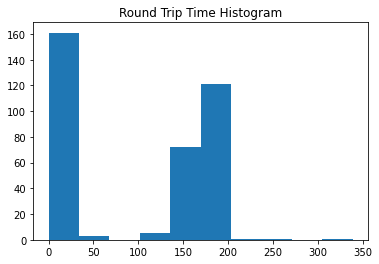

In [5]:
fig, ax = plt.subplots()
ax.hist(df['jsonPayload.rtt_msec'])
ax.set_title("Round Trip Time Histogram")

## Case: Baseline (Central Mongo)

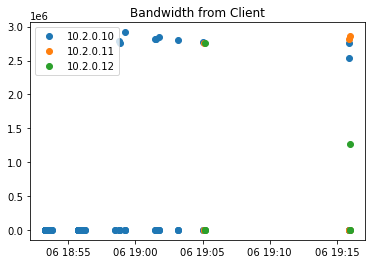

In [30]:
fig, ax = plt.subplots()
# ax.set_ylim(0,500)
for key in toServerDataset: 
    ax.plot(toServerDataset[key]["timestamp"], toServerDataset[key]["jsonPayload.bytes_sent"], label=key, marker='o', linestyle='None')
# set title and legend
ax.set_title('Bandwidth from Client')
ax.legend()

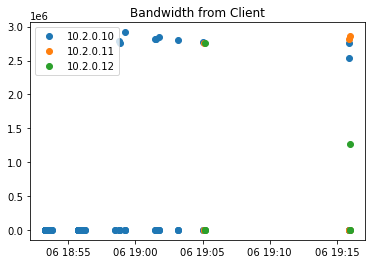

In [30]:
fig, ax = plt.subplots()
# ax.set_ylim(0,500)
for key in toServerDataset: 
    ax.plot(toServerDataset[key]["timestamp"], toServerDataset[key]["jsonPayload.bytes_sent"], label=key, marker='o', linestyle='None')
# set title and legend
ax.set_title('Bandwidth Accumulated')
ax.legend()

## Case: Syncmesh

Text(0.5, 1.0, 'Package Size Histogram for Client to 4')

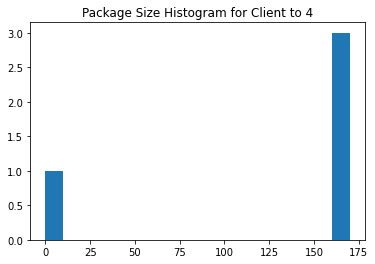

In [4]:
fig, ax = plt.subplots()
# plot histogram
binwidth = 10
ax.hist(fromClientTo4['jsonPayload.bytes_sent'], bins=range(min(fromClientTo4['jsonPayload.bytes_sent']), max(fromClientTo4['jsonPayload.bytes_sent']) + binwidth, binwidth))
ax.set_title("Package Size Histogram for Client to 4")

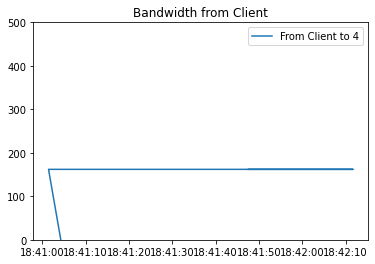

In [6]:
columns = fromClient[["jsonPayload.bytes_sent"]]
# create x data
x_data = range(0, fromClient.shape[0])
# create figure and axis
fig, ax = plt.subplots()
ax.set_ylim(0,500)
# plot each column
# fromClientTo4.groupby(fromClientTo4["timestamp"].dt.minute)["jsonPayload.bytes_sent"].mean().plot(
#     kind='bar', rot=0, ax=ax
# )
ax.plot(fromClientTo4["timestamp"], fromClientTo4["jsonPayload.bytes_sent"], label="From Client to 4")
# set title and legend
ax.set_title('Bandwidth from Client')
ax.legend()

# Comparison